# Lecture 4: Stability (univariate)

## Lecture overview

1. [Stability](#section1)
2. [Local stability analysis in continuous-time one-variable models](#section2)
3. [Local stability analysis in discrete-time one-variable models](#section3)
4. [Summary](#section4)

<span id='section1'></span>
## 1. Stability
<hr>

When a variable is exactly at an equilibrium its value will never change. But what happens when we are not exactly at, but just near an equilibrium?

Starting near an equilibrium, if the system moves towards the equilibrium over time the equilibrium is said to be **locally stable**.

In contrast, if the system moves away from the equilibrium over time the equilibrium is said to be **unstable**.

An equilibrium point is said to be **globally stable** if any starting point leads to it.

We've seen these possibilities already graphically, eg., in phase-line plots for discrete-time diploid selection: when the heterozygote has the lowest fitness the fixation equilibria are locally (but not globally) stable and the polymorphic equilibrium is unstable.

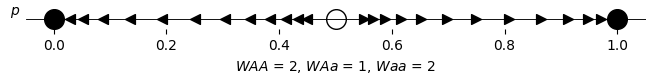

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def phase_line_diploid(p0, WAA, WAa, Waa, max=np.inf):
    'generator for p_t'
    t, pnow, pnext = 0, p0, 0 #initial conditions
    while t < max:
        yield pnow #current value of p(t) and p(t+1)
        pnext = (WAA * pnow**2 + WAa * pnow * (1 - pnow)) / (WAA * pnow**2 + WAa * 2 * pnow * (1 - pnow) + Waa * (1 - pnow)**2) #update p(t+1)
        pnow = pnext #update p(t)
        t += 1 #update t
        
def plot_phase_line_diploid(WAA, WAa, Waa, p0, max=20, ax=None):
    'plot phase line'
    
    # set up figure
    if ax==None:
        fig, ax = plt.subplots()
        fig.set_size_inches(8,0.25)
    
    # Plot phase-line
    ax.axhline(0, color='black', linewidth=0.5)
    
    # Plot vector field
    pts = [pt for pt in phase_line_diploid(p0, WAA, WAa, Waa, max=max)]
    marker = '>' if pts[2] > pts[1] else '<'
    ax.scatter(
        pts,
        np.zeros(max),
        marker=marker, s=50, c='black'
    )
    
    ax.set_xlabel(f"$WAA$ = {WAA}, $WAa$ = {WAa}, $Waa$ = {Waa}")
    
    return ax

# Plot figure
fig, ax = plt.subplots()
fig.set_size_inches(8,0.25)
 
# phase line and vector field
plot_phase_line_diploid(WAA=2, WAa=1, Waa=2, p0=0.45, max=12, ax=ax) #higher starting allele frequency
plot_phase_line_diploid(WAA=2, WAa=1, Waa=2, p0=0.55, max=12, ax=ax) #low starting allele frequency

# equilibria
plt.scatter([0,1],[0,0],s=200,c='black')
plt.scatter([0.5],[0],s=200,c='white',edgecolors='black')

# Remove background axes
ax.set_ylabel('$p$', rotation=0)
ax.get_yaxis().set_ticks([])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_xlim(-0.05,1.05)
plt.show()

Our goal in this lecture is to mathematically determine whether a small perturbation away from an equilibrium point will grow or shrink in magnitude over time $\Longrightarrow$ **local stability analysis**.

### Motivating example

Consider logistic growth in continuous time, with $K = 1000$ and $r = 0.5$.

For populations started near carrying capacity, a plot of $\mathrm{d}n/\mathrm{d}t$ vs. $n$ shows that they move closer to the carrying capacity over time, since the rate of change in $n$ is positive when $n<K$ and negative when $K<n$.

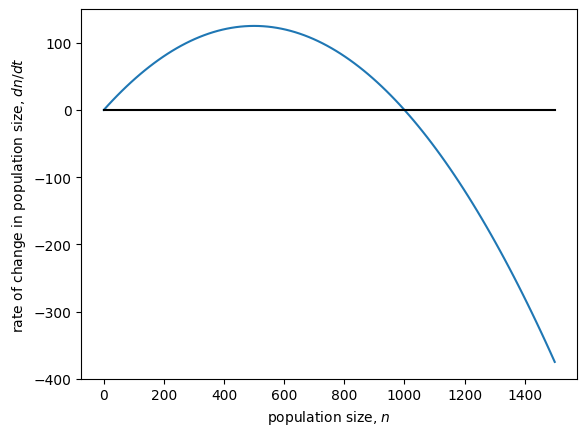

In [3]:
r,k = 0.5,1000
xs = np.linspace(0,1.5*k,100)
ys = [r*n*(1-n/k) for n in xs]
plt.plot(xs,ys)
plt.plot(xs,[0 for _ in xs], color='black')
plt.xlabel('population size, $n$')
plt.ylabel('rate of change in population size, $dn/dt$')
plt.show()

If we drew the same plot for $r=-0.5$ we see that the population size then moves away from $n=K$, as the rate of change in $n$ is negative when $n<K$ and positive when $K<n$. 

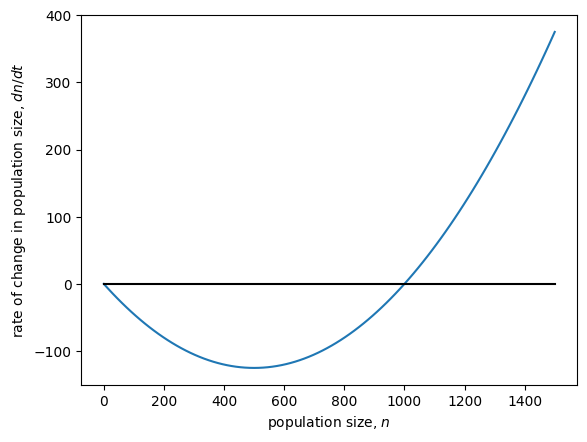

In [4]:
r,k=-0.5,1000
xs = np.linspace(0,1.5*k,100)
ys = [r*n*(1-n/k) for n in xs]
plt.plot(xs,ys)
plt.plot(xs,[0 for _ in xs], color='black')
plt.xlabel('population size, $n$')
plt.ylabel('rate of change in population size, $dn/dt$')
plt.show()

The key difference between these plots near the equilibrium of interest, $\hat n=K$, is that 

    1. in the first case ($r=0.5$), where the equilibrium is stable, $\mathrm{d}n/\mathrm{d}t$ goes from positive to negative, meaning its slope is negative 
    2. in the second case ($r = -0.5$), where the equilibrium is unstable, $\mathrm{d}n/\mathrm{d}t$, goes from negative to positive, meaning its slope is positive

This suggests that we can determine the local stability of an equilibrium by looking at the slope of the differential equation at that equilibrium.

<span id='section2'></span>
## 2. Local stability analysis in continuous-time one-variable models
<hr>

To determine local stability mathematically, we focus on a small perturbation ($\epsilon$) away from an equilibrium ($\hat{x}$) and determine whether this perturbation will grow or shrink.
    
If, at time $t$, the population is a small distance from equilibrium, $x = \hat{x} + \epsilon$, the rate of change in $x$ will be $\mathrm{d}x/\mathrm{d}t = \mathrm{d}(\hat{x} + \epsilon)/\mathrm{d}t$.

Let us call this derivative $f(x)=\mathrm{d}x/\mathrm{d}t$, which we can write as $f(\hat{x} + \epsilon) =  \mathrm{d}(\hat{x} + \epsilon)/\mathrm{d}t$.

To work with this arbitrary function, $f$, let's introduce a pretty remarkable mathematical fact, the Taylor Series.

!!! note "Taylor Series"

    Any function $f(x)$ can be written as an infinite series of derivatives evaluated at $x=a$

    $$
    f(x) = \sum_{k = 0}^{\infty}\frac{f^{(k)}(a)}{k!}(x-a)^k
    $$

    where $f^{(k)}(a)$ is the $k^{\mathrm{th}}$ derivative of the function with respect to $x$, evaluated at point $a$. (See section P1.3 in the text for more information).

In this case we want to write $f(\hat{x} + \epsilon)$ as a Taylor Series evaluated at the equilibrium, $\hat{x} + \epsilon = \hat{x}$

$$
\begin{aligned}
\frac{\mathrm{d}(\hat{x} + \epsilon)}{\mathrm{d}t} &= f(\hat{x} + \epsilon)\\
&= f(\hat{x}) + f^{(1)}(\hat{x})(\hat{x} + \epsilon - \hat{x}) + \frac{f^{(2)}(\hat{x})}{2}(\hat{x} + \epsilon - \hat{x})^2 + \cdots\\
&= f(\hat{x}) + f^{(1)}(\hat{x})\epsilon + \frac{f^{(2)}(\hat{x})}{2}\epsilon^2 + \cdots\\
\end{aligned}
$$

Now, to work with this infinite series we will make an assumption, that we are very the equilibrium, meaning the deviation is small, $\epsilon<<1$. This means that $\epsilon^2$ is even smaller, and $\epsilon^3$ even smaller than that, and so on. By considering small $\epsilon$ we can therefore cut-off our infinite series by ignoring any term with $\epsilon$ to a power greater than 1. This is called a "first order" Taylor series approximation of $f$ around $\epsilon=0$. This assumption is what limits us to determining only *local* stability. Global stability would require us to consider large deviations from the equilibrium as well, which is not possible for even mildly complicated functions, $f$.

OK, so making this assumption of small $\epsilon$ we have

$$
\begin{aligned}
\frac{\mathrm{d}(\hat{x} + \epsilon)}{\mathrm{d}t} &= f(\hat{x}) + f^{(1)}(\hat{x})\epsilon\\
\end{aligned}
$$

Since $\hat{x}$ is an equilibrium, $f(\hat{x})$ equals zero, leaving just $f^{(1)}(\hat{x})\epsilon$ on the right-hand side.

Furthermore, the left-hand side can be expanded and simplified ($\hat{x}$ is a constant that does not change in time)

$$
\begin{aligned}
\frac{\mathrm{d}(\hat{x}+\epsilon)}{\mathrm{d}t} &= \frac{\mathrm{d}\hat{x}}{\mathrm{d}t} + \frac{\mathrm{d}\epsilon}{\mathrm{d}t}\\
&= \frac{\mathrm{d}\epsilon} {\mathrm{d}t}
\end{aligned}
$$

Combining the above, the deviation from the equilibrium will change over time at a rate

$$
\frac{\mathrm{d} \epsilon}{\mathrm{d}t} = f^{(1)}(\hat{x}) \epsilon
$$

This is the same as exponential growth with growth rate $r=f^{(1)}(\hat{x})$.

The deviation will therefore

- grow if $f^{(1)}(\hat{x})>0$ $\implies\hat{x}$ unstable
- shrink if $f^{(1)}(\hat{x})<0$ $\implies\hat{x}$ locally stable

Stability in continuous time therefore requires the slope of the differential equation to be negative at the equilibrium, $f^{(1)}(\hat{x}) = \left.\frac{\mathrm{d}}{\mathrm{d}x}\left(\frac{\mathrm{d}x}{\mathrm{d}t}\right)\right|_{x=\hat{x}} < 0$.

### E.g., logistic growth

Let's again look at the model of logistic growth in continuous time, where

$$
f(n) = \frac{\mathrm{d}n}{\mathrm{d}t} = rn \left(1 - \frac{n}{K}\right)
$$

The derivative of $f$ with respect to $n$ is

$$
f'(n) = r - 2 r\frac{n}{K}
$$

Plugging in $n=K$ gives

$$
f'(K) = r - 2 r = -r
$$

This implies that $r>0$ causes local stability of $\hat{n}=K$. We can check this is consistent with a graphical analysis, below.

In [11]:
def f(n,r,k):
    'differential equation for logistic growth'
    return n*r*(1-n/k)

def plot_logistic_de(r,k,ax=None):
    'plot differential equation for logistic growth as function of n'
    xs = np.linspace(0,k*1.5,100) #n values
    if ax == None:
        fig, ax = plt.subplots() 
    # 0 line
    ax.plot(xs, [0 for _ in xs], color='black', linestyle='--')
    # differential equation
    ax.plot(xs, [f(x,r,k) for x in xs], color='black')
    #aesthetics
    ax.set_xlabel('$n$')
    ax.set_ylabel('$dn/dt$')
    ax.set_title('$r=$%.1f'%r)
    return ax

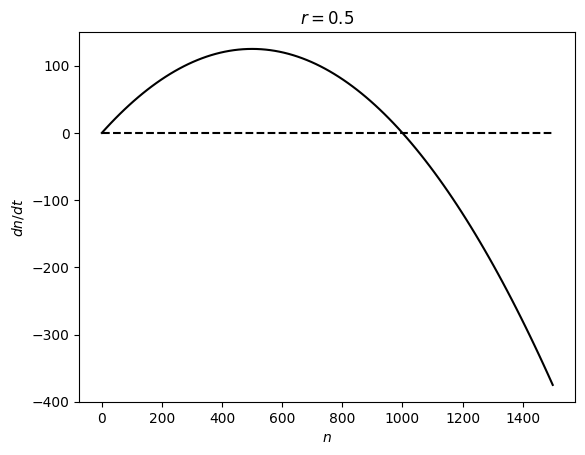

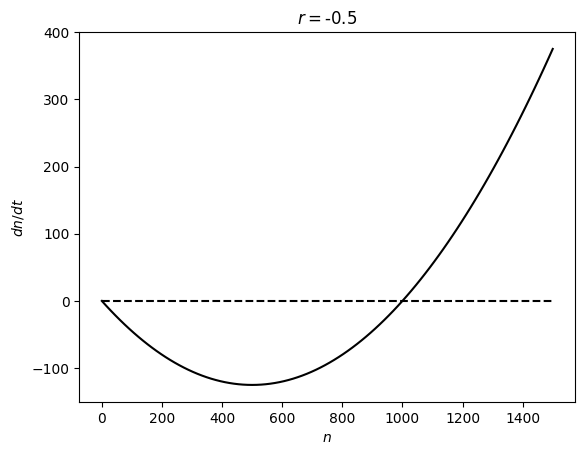

In [12]:
plot_logistic_de(r=0.5, k=1000)
plt.show()
plot_logistic_de(r=-0.5, k=1000)
plt.show()

<span id='section3'></span>
## 3. Local stability analysis in discrete-time one-variable models
<hr>

In discrete time we instead work with a recursion equation, $x(t+1) = f(x(t))$.

Again, consider a system that is a small distance from the equilibrium at time $t$: $x(t) = \hat{x} + \epsilon(t)$.

At time $t+1$, the population will be at $x(t+1) = \hat{x} + \epsilon(t+1) = f(\hat{x} + \epsilon(t))$.

Taking the Taylor Series of $f(\hat{x} + \epsilon(t))$ around $\epsilon(t)=0$ and truncating to first order (under our assumption of small $\epsilon$) we have

$$
\begin{aligned}
\hat{x} + \epsilon(t+1) &= f(\hat{x} + \epsilon(t))\\
&= f(\hat{x}) + f^{(1)}(\hat{x})(\hat{x} + \epsilon(t) - \hat{x})\\
&= f(\hat{x}) + f^{(1)}(\hat{x})\epsilon(t)
\end{aligned}
$$

We know that $f(\hat{x}) = \hat{x}$ because $\hat{x}$ is an equilibrium, which implies

$$
\epsilon(t+1) = f^{(1)}(\hat{x})\epsilon(t)
$$

This is the recursion for exponential growth, with reproductive factor $\lambda = f^{(1)}(\hat{x})$. 

Based on our knowledge of discrete-time exponential growth, we therefore know that the deviation from equilibrium will:

- move from one side of the equilibrium to the other (i.e., oscillate) if $\lambda$ is negative
    - grow if $\lambda<-1$ $\implies\hat{x}$ unstable
    - shrink if $-1<\lambda<0$ $\implies\hat{x}$ locally stable


- stay on the same side of the equilibrium (i.e., not oscillate) if $\lambda$ is positive
    - shrink if $0<\lambda<1$ $\implies\hat{x}$ locally stable
    - grow if $1<\lambda$ $\implies\hat{x}$ unstable
    
Local stability in discrete time therefore requires the slope of the recursion to be between -1 and 1 at the equilibrium, $-1<f^{(1)}(\hat{x})=\left.\frac{\mathrm{d}x_{t+1}}{\mathrm{d}x_t}\right|_{x_t=\hat x}<1$.

### E.g., logistic growth

To see how this works, let's look at the logistic growth model in discrete time. Here the recursion is

$$
f(n) = n \left(1 + r\left(1 - \frac{n}{K}\right)\right)
$$

We first take the derivative of $f$ with respect to $n$

$$
f'(n) = 1 + r - 2 r \frac{n}{K}
$$

Then we plug in the equilirbium value of interest, $n=K$

$$
\begin{aligned}
f'(K) &= 1 + r - 2 r \\
&= 1 - r
\end{aligned}
$$

This will be negative when $r > 1$, creating oscillations.

The equilibrium will be stable when $-1 < 1 - r < 1 \implies 0 < r < 2$.

This is consistent with what we've seen in cob-web plots, as below.

In [15]:
# logistic growth recursion
def f(nt,r,k):
    return nt * (1 + r * (1 - nt / k))

# Build cobweb plotting function
def cobweb_logistic(n0, r, k, max=np.inf):
    t, nnow, nnext = 0, n0, 0 #initial conditions
    while t < max:
        yield nnow, nnext #current value of n(t) and n(t+1)
        nnext = f(nnow,r,k)
        yield nnow, nnext #current value of n(t) and n(t+1)
        nnow = nnext #update n(t)
        t += 1 #update t

# Plot
def plot_logistic_with_cobweb(r, k, n0, ncobs=10, ax=None):
    # Plot the curves (add an additional curve past equilibrium to show stability)
    xs = np.linspace(0,k*1.5,100) #x values
    if ax == None:
        fig, ax = plt.subplots() 
    #1:1 line
    ax.plot(xs, xs, color='black', linestyle='dashed')
    # recursion
    ax.plot(xs, [f(x,r,k) for x in xs], color='black')
    # cobweb
    cobweb = np.array([i for i in cobweb_logistic(n0, r, k, ncobs)])
    plt.plot(cobweb[:,0], cobweb[:,1], color='blue')
    #aesthetics
    ax.set_ylim(0,None)
    ax.set_xlim(0,None)
    ax.set_xlabel('$n_t$')
    ax.set_ylabel('$n_{t+1}$')
    ax.set_title('$r=$%.1f'%r)
    return ax

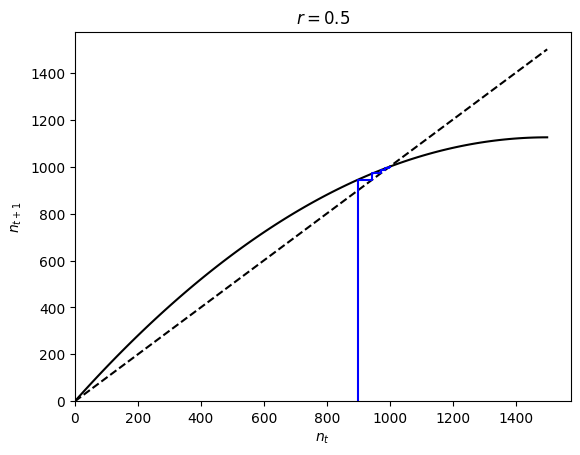

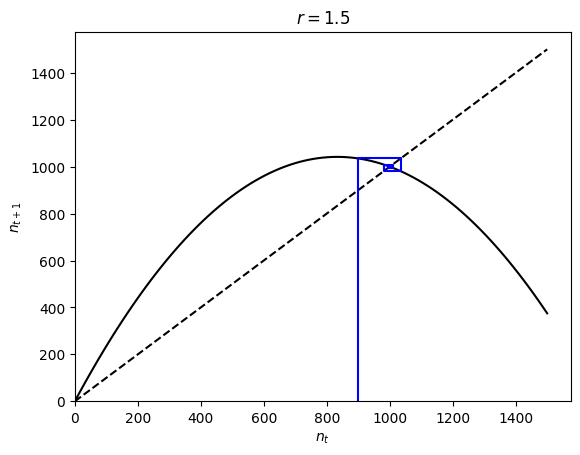

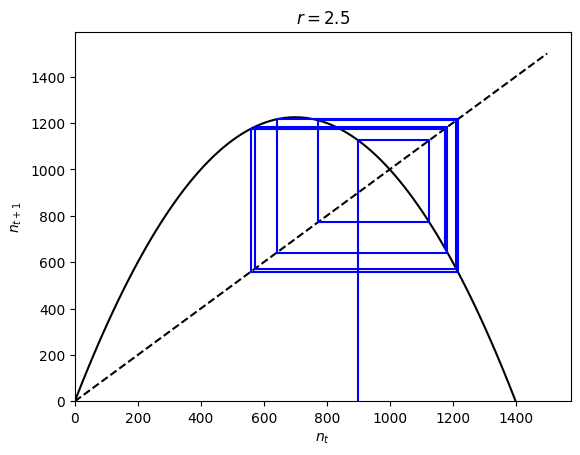

In [17]:
plot_logistic_with_cobweb(r=0.5, k=1000, n0=900)
plot_logistic_with_cobweb(r=1.5, k=1000, n0=900)
plot_logistic_with_cobweb(r=2.5, k=1000, n0=900)
plt.show()

<span id='section4'></span>
## 4. Summary
<hr>

Local stability analysis for continuous- and discrete-time models with one variable:

1. take the derivative of the differential equation or recursion with respect to the variable, $f^{(1)}(x)$
2. plug in the equilibrium value of the variable, $f^{(1)}(\hat x)$
3. determine the sign (and magnitude in discrete-time)